# <b>Name :</b> Dharmik Vara  
# <b>Student ID :</b> 24215287


# <b>Dataset :</b> Dublin Rental Database

<li> The month in which the rental property was listed.
<li> The specific locality in Dublin where the rental property is located.
<li> The broader geographical region where the rental property is located.
<li> The type of property being rented.
<li> The number of bedrooms in the rental property.
<li> The number of bathrooms in the rental property.
<li> Whether the rental property has a garden.
<li> Whether parking space is available at the property.
<li> The duration of the lease agreement in months.
<li> The contact information for the property agent or landlord.
<li> The monthly rental price of the property.


http://mlg.ucd.ie/modules/python/assignment1/rental/index.html

## <b> Data Cleaning

In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv('dublin_rental_data.csv')
df.head()

,Quarter,Month,Price,Property Type,Location,Bedrooms,Bathrooms,Parking,Garden,Lease Length,Contact
0,Q1,January 2024,"€ 7,200",Apartment,Dublin City South - Dublin 2,3,1 Bathroom,Yes,No,3 months,Estate Agent
1,Q1,January 2024,"€ 2,960 per month",Apartment,Dublin City South - Dublin 24,2 Bedrooms,2 Bathrooms,Yes,???,3 months,Estate Agent
2,Q1,January 2024,"€1,920.00 per month",Apartment,Dublin City South - Dublin 24,2 Bedrooms,2 Bathrooms,No,No,12 months,Estate Agent
3,Q1,January 2024,"€ 2,590",Apartment,Dublin City South - Dublin 6,2 Bedrooms,1 Bathroom,No,No,12 months,Estate Agent
4,Q1,January 2024,"€ 4,360 per month",House,Dublin City North - Dublin 1,3,2 Bathrooms,Yes,Yes,6 months,Estate Agent


### Checking number of unique values in each column

In [3]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

Quarter : 4
Month : 12
Price : 849
Property Type : 2
Location : 24
Bedrooms : 10
Bathrooms : 8
Parking : 5
Garden : 5
Lease Length : 7
Contact : 2


### Checking unique values in each categorical columns

In [4]:
for col in ['Quarter', 'Month', 'Property Type', 'Location', 'Parking', 'Garden', 'Contact', 'Bedrooms', 'Bathrooms', 'Lease Length']:
    print(f'{col} : {df[col].unique()}')

Quarter : ['Q1' 'Q2' 'Q3' 'Q4']
Month : ['January 2024' 'February 2024' 'March 2024' 'April 2024' 'May 2024'
 'June 2024' 'July 2024' 'August 2024' 'September 2024' 'October 2024'
 'November 2024' 'December 2024']
Property Type : ['Apartment' 'House']
Location : ['Dublin City South - Dublin 2' 'Dublin City South - Dublin 24'
 'Dublin City South - Dublin 6' 'Dublin City North - Dublin 1'
 'North Co Dublin' 'Dublin City North - Dublin 17'
 'Dublin City South - Dublin 8' 'Dublin City South - Dublin 16'
 'Dublin City South - Dublin 6W' 'South Co Dublin'
 'Dublin City South - Dublin 4' 'Dublin City North - Dublin 9'
 'Dublin City North - Dublin 3' 'Dublin City North - Dublin 11'
 'Dublin City North - Dublin 13' 'Dublin City North - Dublin 15'
 'Dublin City South - Dublin 18' 'Dublin City South - Dublin 14'
 'Dublin City South - Dublin 10' 'Dublin City North - Dublin 7'
 'Dublin City South - Dublin 20' 'Dublin City South - Dublin 22'
 'Dublin City South - Dublin 12' 'Dublin City North - Dubl

### Data Issues

1. Values in Quarter, Property Type and Contact column seems fine. So no need to do anything in these columns. <br>
2. All the values in Month column belongs same year so we can shorten it to first 3 characters of each month. <br>
3. Parking and Graden column has non-uniform values and hence we will make it uniform and replace unknown values with unknown. <br>
4. Location column contains collective values which can be used to derive other useful information like Region and Postal Code. <br>
5. For Bedrooms and Bathrooms columns, all the values signifies number of bedrooms and bathrooms in the property. <br>
6. The values in Lease Length signifies length of lease in terms of months and hence these values need to be converted to numerical values and replacing unknwon values with null values. <br>
7. As per the data description, Price column contains monthly rental price. Need to extract just the numerical values, remove the currency denotation and any extra characters like 'per month'.

### Extracting only the first three characters of the month to shorten the length as the data is of same year

In [5]:
df['Month'] = df['Month'].apply(lambda x : x[:3])

### Making all the values in the column uniform and replacing unknown values with 'None'

In [6]:
dict_bools = {'Yes' : 'Yes','Y' : 'Yes', 'No' : 'No', 'N' : 'No', '???' : None}
df['Parking'] = df['Parking'].map(dict_bools)
df['Garden'] = df['Garden'].map(dict_bools)

### Shortening the value in column to North and South

In [7]:
df['Region'] = df['Location'].apply(lambda x : 'North' if 'North' in x else 'South')

### Removing the extra characters and keeping only the postal districts. Also replacing the unspecific region counties with 'None' and putting it into the new column

In [8]:
df['Postal Districts'] = df['Location'].apply(lambda x : x.split('-')[-1].strip())
df['Postal Districts'] = df['Postal Districts'].apply(lambda x : None if x in ['South Co Dublin', 'North Co Dublin'] else 'Dublin 6' if x == 'Dublin 6W' else x)

### Removing the column as we have already extracted the necessary data needed

In [9]:
df.drop('Location', axis = 1, inplace = True)

In [10]:
df['Bedrooms'].unique()

array(['3', '2 Bedrooms', '3 Bedrooms', '1 Bedroom', '2', '4 Bedrooms',
       '1', '4', '5 Bedrooms', '5'], dtype=object)

### Putting numerical values in the column and removing extra characters

In [11]:
df['Bedrooms'] = df['Bedrooms'].apply(lambda x : int(x.split(' ')[0]))
df['Bathrooms'].unique()

array(['1 Bathroom', '2 Bathrooms', '3 Bathrooms', '2', '1',
       '4 Bathrooms', '3', '4'], dtype=object)

### Putting numerical values in the column and removing extra characters

In [12]:
df['Bathrooms'] = df['Bathrooms'].apply(lambda x : int(x.split(' ')[0]))

### Removing unnecessary characters and keeping only the numerical values for rental price every month

In [13]:
df['Price'] = df['Price'].apply(lambda x : float(x.replace('€', '').replace('per month', '').replace(',','').strip()))
df['Lease Length'].unique()

array(['3 months', '12 months', '6 months', '12.0', '3.0', '6.0', '???'],
      dtype=object)

### Making the values uniform through the column

In [14]:
lease_dicts = {'???' : None, '3 months' : '3 Months', '6 months' : '6 Months', '12 months' : '12 Months', '3,0' : '3 Months', '6.0' : '6 Months', '12.0' : '12 Months'}
df['Lease Length'] = df['Lease Length'].map(lease_dicts)

In [15]:
df.head()

,Quarter,Month,Price,Property Type,Bedrooms,Bathrooms,Parking,Garden,Lease Length,Contact,Region,Postal Districts
0,Q1,Jan,7200.0,Apartment,3,1,Yes,No,3 Months,Estate Agent,South,Dublin 2
1,Q1,Jan,2960.0,Apartment,2,2,Yes,None,3 Months,Estate Agent,South,Dublin 24
2,Q1,Jan,1920.0,Apartment,2,2,No,No,12 Months,Estate Agent,South,Dublin 24
3,Q1,Jan,2590.0,Apartment,2,1,No,No,12 Months,Estate Agent,South,Dublin 6
4,Q1,Jan,4360.0,House,3,2,Yes,Yes,6 Months,Estate Agent,North,Dublin 1


### Saving the data into a new csv file 

In [16]:
df.to_csv('dublin_rental_data_cleaned.csv', index = None)

## <b> Data Analysis

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline 

In [18]:
df = pd.read_csv('dublin_rental_data_cleaned.csv')
df.head()

,Quarter,Month,Price,Property Type,Bedrooms,Bathrooms,Parking,Garden,Lease Length,Contact,Region,Postal Districts
0,Q1,Jan,7200.0,Apartment,3,1,Yes,No,3 Months,Estate Agent,South,Dublin 2
1,Q1,Jan,2960.0,Apartment,2,2,Yes,NaN,3 Months,Estate Agent,South,Dublin 24
2,Q1,Jan,1920.0,Apartment,2,2,No,No,12 Months,Estate Agent,South,Dublin 24
3,Q1,Jan,2590.0,Apartment,2,1,No,No,12 Months,Estate Agent,South,Dublin 6
4,Q1,Jan,4360.0,House,3,2,Yes,Yes,6 Months,Estate Agent,North,Dublin 1


### Checking number of null values in each column

In [19]:
df.isna().sum()

Quarter               0
Month                 0
Price                 0
Property Type         0
Bedrooms              0
Bathrooms             0
Parking             108
Garden              177
Lease Length         57
Contact               0
Region                0
Postal Districts     99
dtype: int64

### Differentiating Numerical and Categorical columns

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Quarter           1950 non-null   object 
 1   Month             1950 non-null   object 
 2   Price             1950 non-null   float64
 3   Property Type     1950 non-null   object 
 4   Bedrooms          1950 non-null   int64  
 5   Bathrooms         1950 non-null   int64  
 6   Parking           1842 non-null   object 
 7   Garden            1773 non-null   object 
 8   Lease Length      1893 non-null   object 
 9   Contact           1950 non-null   object 
 10  Region            1950 non-null   object 
 11  Postal Districts  1851 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 182.9+ KB


In [21]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if df[col].dtype != 'O']

print(f'There are {len(cat_cols)} categorical columns and {len(num_cols)} numerical columns.')
print('\nCategorical Columns : ', cat_cols)
print('\nNumerical Columns : ', num_cols)

There are 9 categorical columns and 3 numerical columns.

Categorical Columns :  ['Quarter', 'Month', 'Property Type', 'Parking', 'Garden', 'Lease Length', 'Contact', 'Region', 'Postal Districts']

Numerical Columns :  ['Price', 'Bedrooms', 'Bathrooms']


In [22]:
print('Number of unique values in each categorical column\n')
for col in cat_cols:
    print(f'{col} : {df[col].nunique()}')

Number of unique values in each categorical column

Quarter : 4
Month : 12
Property Type : 2
Parking : 2
Garden : 2
Lease Length : 3
Contact : 2
Region : 2
Postal Districts : 21


### Proportion of categories in each column

In [23]:
for col in cat_cols:
    print(f'----------------{col}----------------')
    print(df[col].value_counts(normalize=True))

----------------Quarter----------------
Quarter
Q1    0.261538
Q2    0.261026
Q3    0.259487
Q4    0.217949
Name: proportion, dtype: float64
----------------Month----------------
Month
Sep    0.100513
Apr    0.092821
Mar    0.091795
May    0.089744
Jan    0.086667
Feb    0.083077
Oct    0.082051
Nov    0.082051
Jul    0.081026
Jun    0.078462
Aug    0.077949
Dec    0.053846
Name: proportion, dtype: float64
----------------Property Type----------------
Property Type
Apartment    0.753846
House        0.246154
Name: proportion, dtype: float64
----------------Parking----------------
Parking
No     0.683496
Yes    0.316504
Name: proportion, dtype: float64
----------------Garden----------------
Garden
No     0.770446
Yes    0.229554
Name: proportion, dtype: float64
----------------Lease Length----------------
Lease Length
12 Months    0.724247
6 Months     0.165346
3 Months     0.110407
Name: proportion, dtype: float64
----------------Contact----------------
Contact
Estate Agent    0.7
Owne

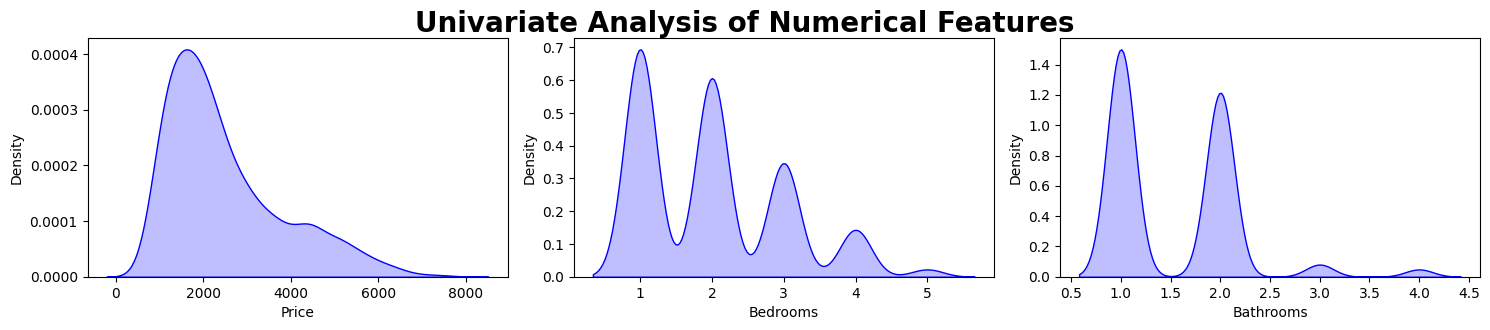

In [24]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold')

for i in range(0, len(num_cols)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(df[num_cols[i]], shade=True, color = 'b')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

#### Insights :
<li> Price of most properties in between 1000 and 2500 euros. </li>
<li> Most properties have 1 bedroom and 1 bathroom. </li>

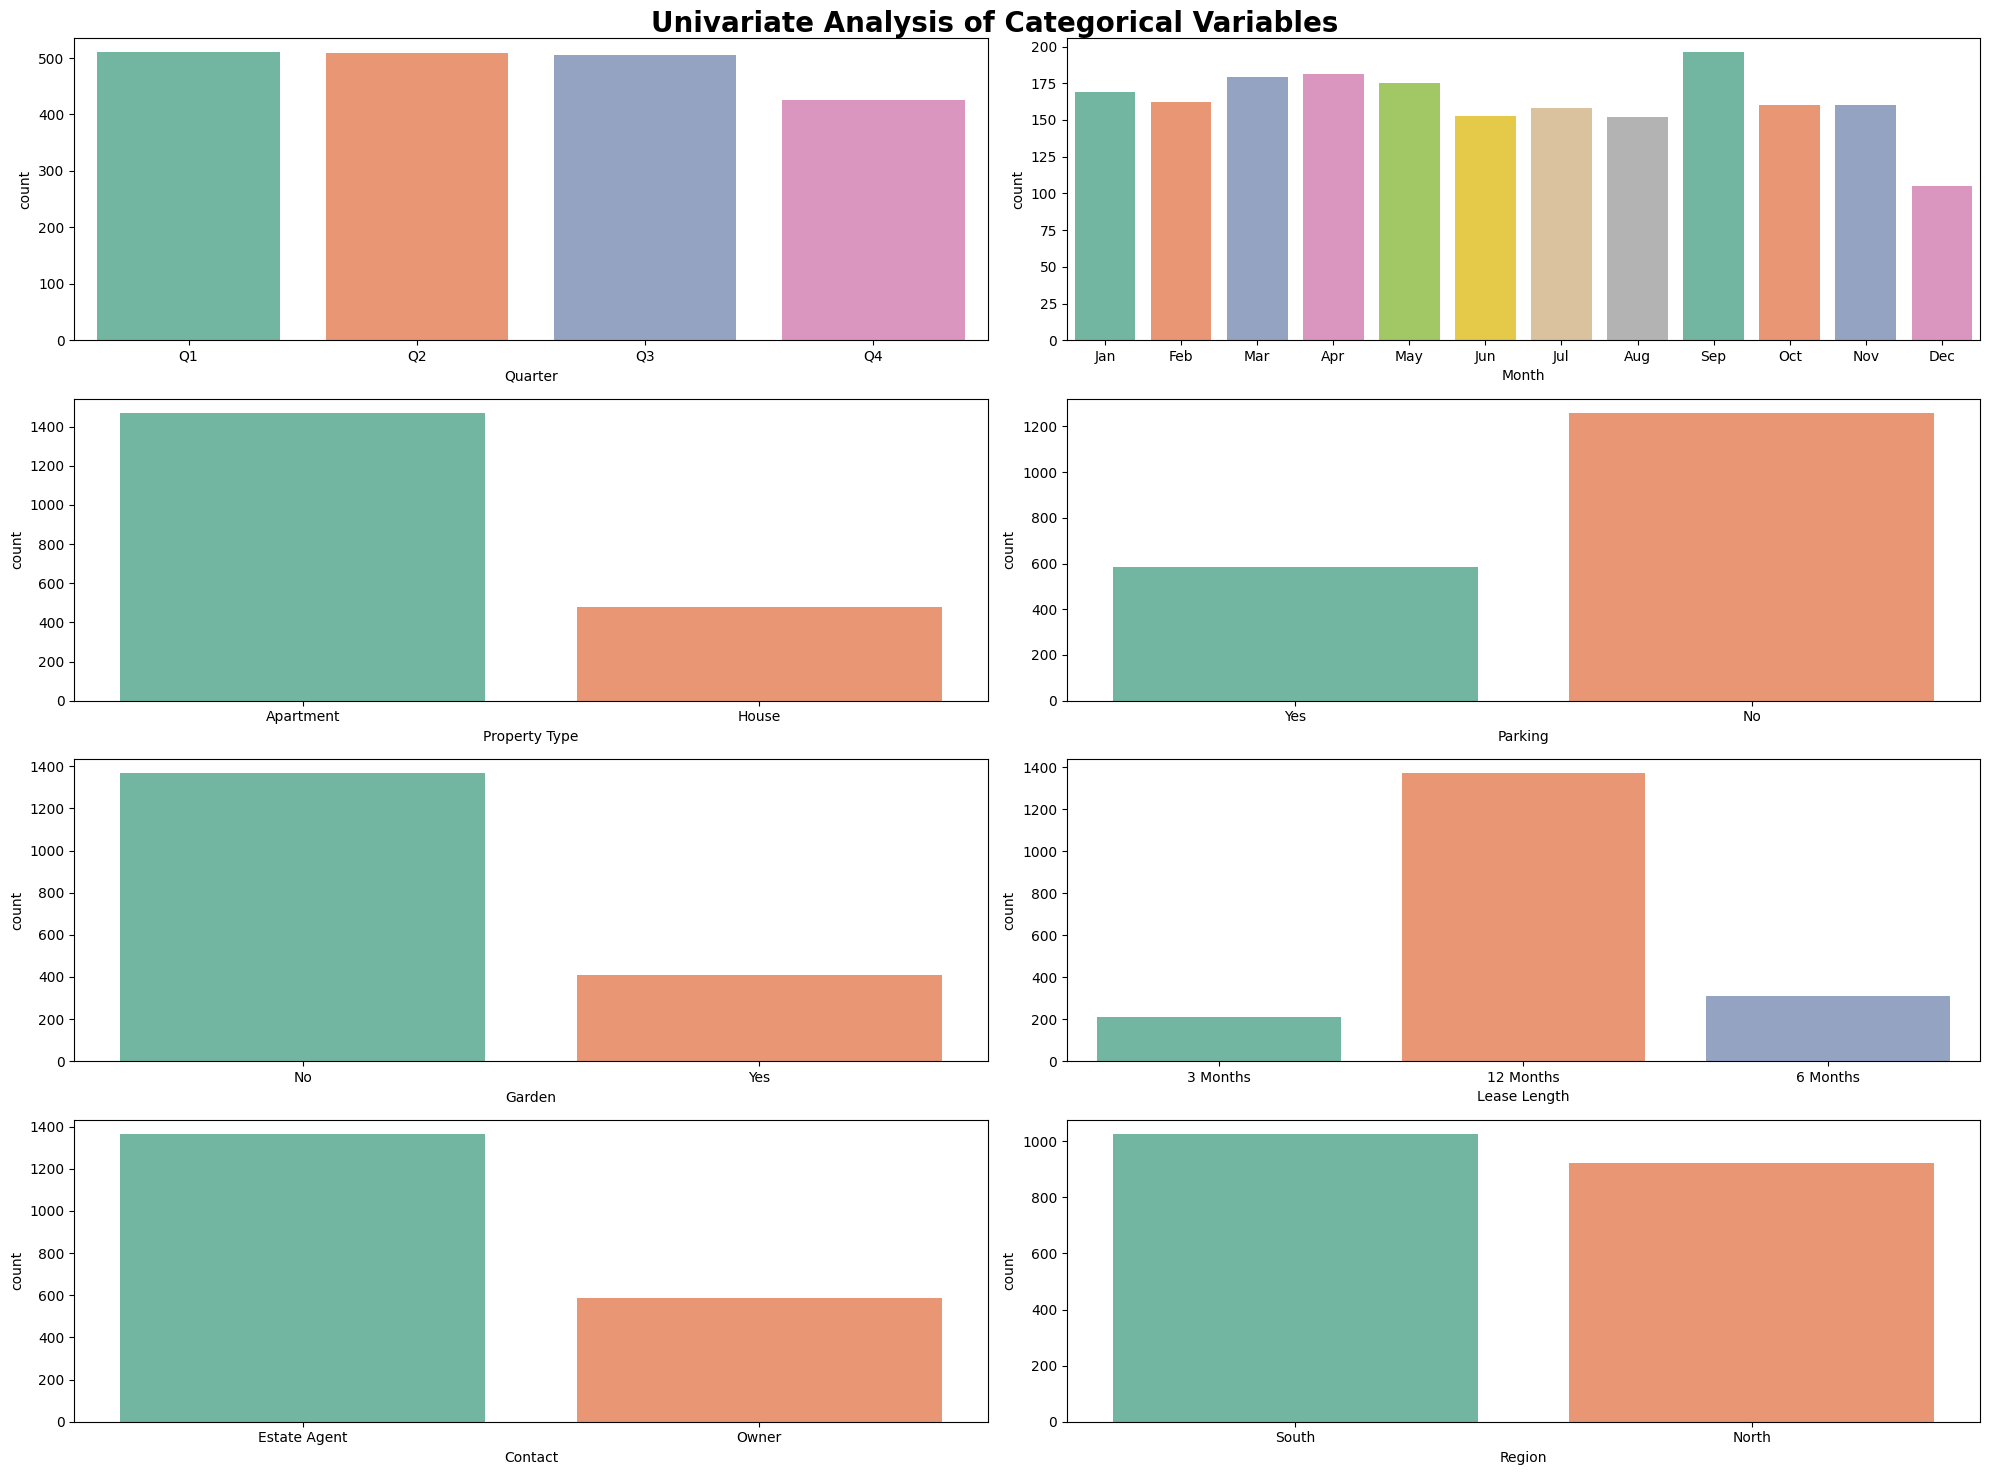

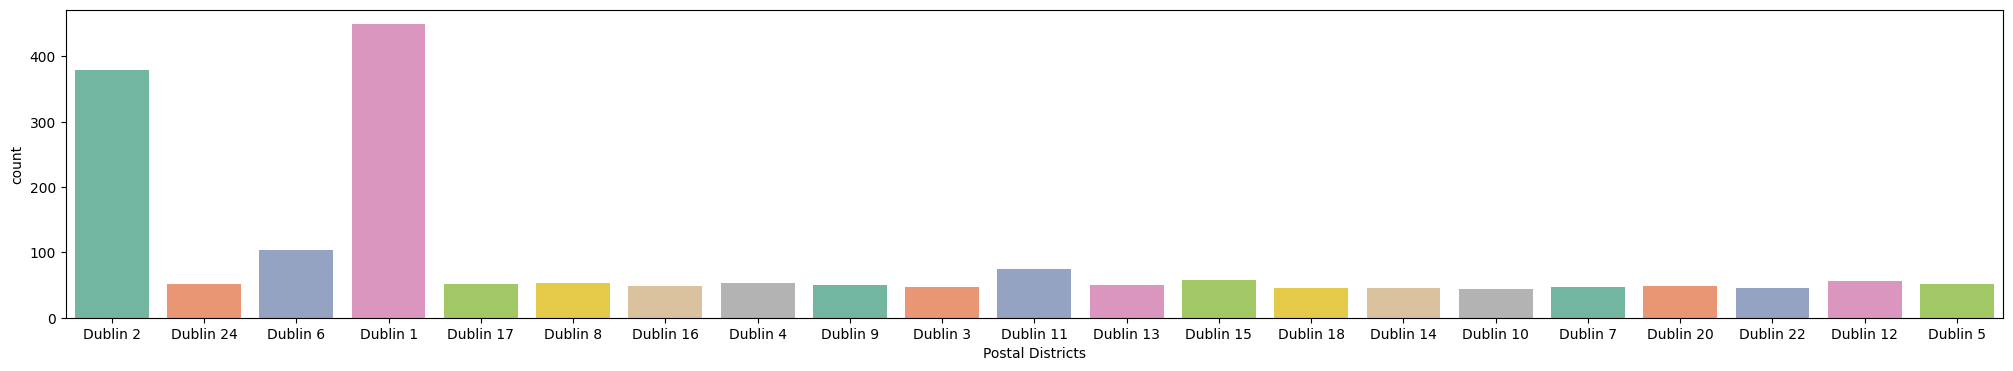

In [25]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Variables', fontsize=20, fontweight='bold')

for i in range(0,len(cat_cols)-1):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cat_cols[i]], palette = 'Set2')
    plt.tight_layout()
    
plt.figure(figsize = (25, 4))
sns.countplot(x=df['Postal Districts'], palette = 'Set2')
plt.show()

#### Insights :
<li> Number of rental properties available in first 3 quarter is almost similar. In the 4th quarter, there is a slight decrease.</li>
<li> More than 75% of rental properties are apartments.</li>
<li> Around 68.3% and 77% of the rental properties does not have parking and garden availability.</li>
<li> More than 70% of the properties have 12 months of lease agreement.</li>
<li> 70% of the rental properties are managed by eastate agents and the rest 30% are by property owners.</li>
<li> Approximately 575 of the rental properties are present in southern region of Dublin and 43% are in northern region.</li>

### Rental property distribution based on postal districts

<Axes: ylabel='count'>

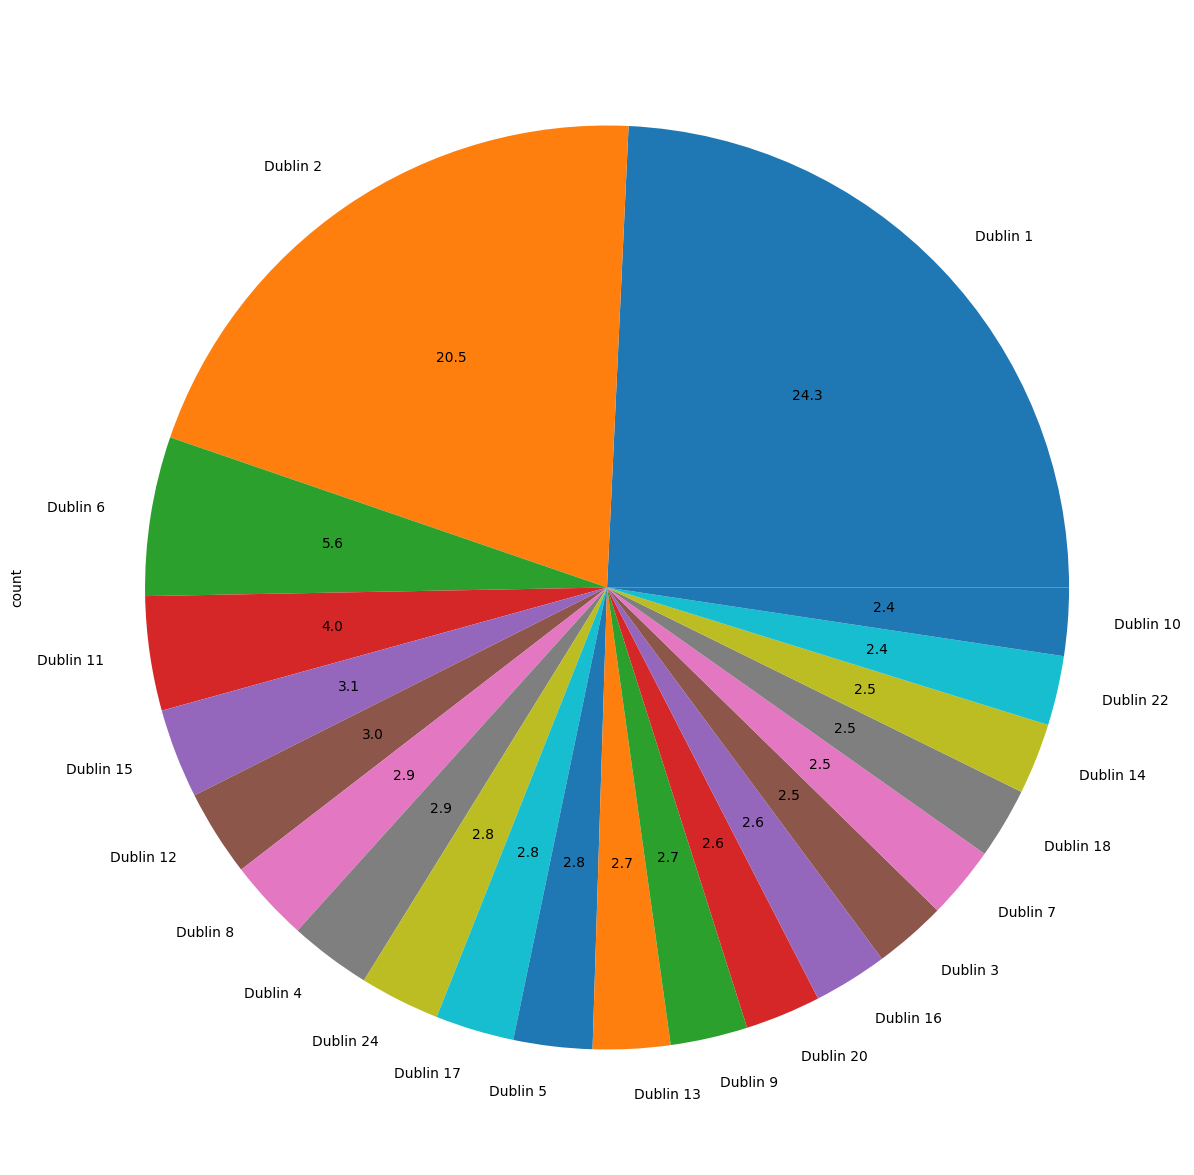

In [26]:
df['Postal Districts'].value_counts().plot.pie(y=df['Postal Districts'], figsize=(15,15), autopct = '%1.1f')

In [27]:
print('Top 5 districts with most rental properties in Dublin : ')
pd.DataFrame(df['Postal Districts'].value_counts()).reset_index().rename(columns={'count':'Counts'}).head()

Top 5 districts with most rental properties in Dublin : 


,Postal Districts,Counts
0,Dublin 1,449
1,Dublin 2,379
2,Dublin 6,103
3,Dublin 11,74
4,Dublin 15,58


Most of the regions are surrounding the city centre. This could be possibly due to availability bars, clubs, restaurants, educational institutions, etc. in neighbourhood and walking distance.

In [28]:
print('Top 5 districts with least rental properties in Dublin : ')
pd.DataFrame(df['Postal Districts'].value_counts()).reset_index().rename(columns={'count':'Counts'}).tail()

Top 5 districts with least rental properties in Dublin : 


,Postal Districts,Counts
16,Dublin 7,47
17,Dublin 18,46
18,Dublin 14,46
19,Dublin 22,45
20,Dublin 10,44


### Rental property availability based on months of year

In [29]:
print('Top 5 months with most rental properties available in Dublin : ')
pd.DataFrame(df['Month'].value_counts()).reset_index().rename(columns={'count':'Counts'}).head()

Top 5 months with most rental properties available in Dublin : 


,Month,Counts
0,Sep,196
1,Apr,181
2,Mar,179
3,May,175
4,Jan,169


Majority of the rental proeprties are available in the month of September due to large immigration of international students. Students even graduate during this time of the year and might shift to other city or country for jobs.

In [30]:
print('Top 5 months with least rental properties available in Dublin : ')
pd.DataFrame(df['Month'].value_counts()).reset_index().rename(columns={'count':'Counts'}).tail()

Top 5 months with least rental properties available in Dublin : 


,Month,Counts
7,Nov,160
8,Jul,158
9,Jun,153
10,Aug,152
11,Dec,105


These are the months of holidays so lesser amount of people look for renting a property.

### Average prices of rental properties in different districts

In [31]:
print('Top 5 districts with highest average prices of properties:')
pd.DataFrame(np.round(df.groupby(['Postal Districts'])[['Price']].mean(),2)).sort_values(by='Price', ascending = False).head()

Top 5 districts with highest average prices of properties:


,Price
Postal Districts,
Dublin 4,3233.96
Dublin 16,2847.29
Dublin 10,2828.86
Dublin 6,2777.96
Dublin 13,2716.00


The higher rental prices in Dublin 4 could be due to the presence of UCD. Most of the student look for renting a place nearby the institution and the property owners or estate agents could be taking advantage of the same.

In [32]:
print('Top 5 districts with least average prices of properties:')
pd.DataFrame(np.round(df.groupby(['Postal Districts'])[['Price']].mean(),2)).sort_values(by='Price', ascending = True).head()

Top 5 districts with least average prices of properties:


,Price
Postal Districts,
Dublin 24,1951.73
Dublin 17,2259.02
Dublin 15,2302.76
Dublin 1,2353.43
Dublin 22,2382.67


Dublin 24 is located in the outskirts of the city so less people prefer to rent a property far from the city.

### Average prices of property based on different factors

In [33]:
print('Average price of property based on property type:')
pd.DataFrame(np.round(df.groupby(['Property Type'])[['Price']].mean(),2))

Average price of property based on property type:


,Price
Property Type,
Apartment,1973.25
House,4093.58


In [34]:
print('Average price of property based on number of bedrooms:')
pd.DataFrame(np.round(df.groupby(['Bedrooms'])[['Price']].mean(),2))

Average price of property based on number of bedrooms:


,Price
Bedrooms,
1,1629.76
2,2198.44
3,3972.73
4,4044.48
5,4587.92


In [35]:
print('Average price of property based on number of bathrooms:')
pd.DataFrame(np.round(df.groupby(['Bathrooms'])[['Price']].mean(),2))

Average price of property based on number of bathrooms:


,Price
Bathrooms,
1,2292.46
2,2557.01
3,4278.91
4,4282.73


In [36]:
print('Average price of property based on availability of parking:')
pd.DataFrame(np.round(df.groupby(['Parking'])[['Price']].mean(),2))

Average price of property based on availability of parking:


,Price
Parking,
No,2226.35
Yes,3098.95


In [37]:
print('Average price of property based on availability of garden:')
pd.DataFrame(np.round(df.groupby(['Garden'])[['Price']].mean(),2))

Average price of property based on availability of garden:


,Price
Garden,
No,1998.02
Yes,4165.75


In [38]:
print('Average price of property based on property type and region:')
pd.DataFrame(np.round(df.groupby(['Property Type','Region'])[['Price']].mean(),2))

Average price of property based on property type and region:


Price
Property Type Region         
Apartment     North   1951.20
              South   1993.30
House         North   3951.38
              South   4218.01

In [39]:
print('Average price of each property in every quarter:')
pd.DataFrame(np.round(df.groupby(['Quarter', 'Property Type'])[['Price']].mean(),2))

Average price of each property in every quarter:


Price
Quarter Property Type         
Q1      Apartment      1907.63
        House          3923.72
Q2      Apartment      1917.36
        House          4062.99
Q3      Apartment      1995.81
        House          4072.96
Q4      Apartment      2092.83
        House          4339.27

# Conclusions

The assignment is about the extracting the data from the website and use it for analysis of rental proeprties based on numerous factors like number of bedrooms, bathrooms, region, etc.

Most of the properties are present near the city centre because of the source of tourist attractions and night life.

The analysis can be deeper if we can add few more features like age, occupation of the tenant and distance from transport facilities, distance from workplace, etc.

We can even perform a comparative analysis based on the inflation rate and historical prices of properties. 

Furthermore, we can use the data for below mentioned use-cases

    1) Targetted Marketing : Focus more on the regions and postal codes where demand and prices are high consistently like some specific areas of South Dublin.
  
    2) Investment Stategies : Invest in properties with parking and garden availability or number of bedrooms and bathrooms, as these correlate positively with rental price.

    3) Property Listings : Accuracy of listings can be verified if any of the properties are with unusually high or low rental prices and the listing strategies can be optimised accordingly.

    4) Renting Strategies : Flexibility in lease lengths for popular destinations to attract potential tenants.